##Numerical data analysis##

First lets import everything

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
df = pd.read_csv("../input/movie_metadata.csv")

movie_metadata.csv



Looking at the shape of the data

In [2]:
print (df.shape)

(5043, 28)


After removing all the NaN values, we are left with 3756 rows.

In [3]:
df1 = df.dropna()
print (df1.shape)
print (df.dtypes)

(3756, 28)
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio               

After removing all the non-nuerical attributes, we are left with 16 attributes.

In [4]:
df2 = df1.select_dtypes(include=['int64','float64']) #only float and int values
print (df2.shape)

(3756, 16)


**Create a new column called 'profit', which is the percent profit made upon revenue generated. This will remove all the factors such as inflation and exchange rates**

In [5]:
profit = (((df2['gross'].values)-(df2['budget'].values))/(df2['gross'].values))*100
df2.loc[:,'profit'] = pd.Series(profit, index=df2.index)
print (df2.head(5))

   num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
5                   462.0     132.0                    475.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
5                   530.0                   640.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   
2    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.228631   
duration                                 0.228631  1.000000   
director_facebook_likes                  0.175128  0.180644   
actor_3_facebook_likes                   0.252782  0.125797   
actor_1_facebook_likes                   0.165986  0.083632   
gross                                    0.464187  0.245726   
num_voted_users                          0.592473  0.339592   
cast_total_facebook_likes                0.236533  0.120179   
facenumber_in_poster                    -0.034365  0.026919   
num_user_for_reviews                     0.563684  0.351595   
budget                                   0.104717  0.068012   
title_year                               0.420202 -0.130211   
actor_2_facebook_likes                   0.253125  0.128935   
imdb_score                               0.347886  0.366221   
aspect_ratio                             0.180230  0.15

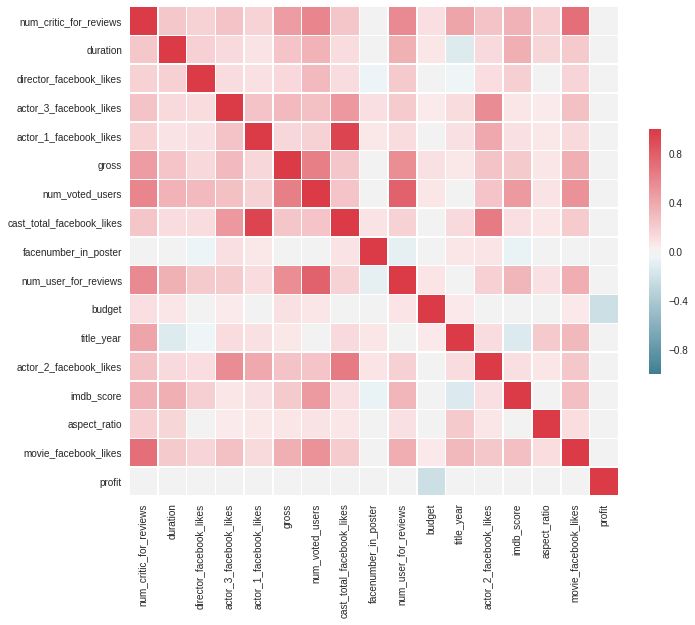

In [6]:
corr = df2.corr()
print (corr)

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**As we can observe profit doesnt depend on any numerical attribute, not even IMDB score**

Now lets visualize the percent profits in years 1980 to 2020

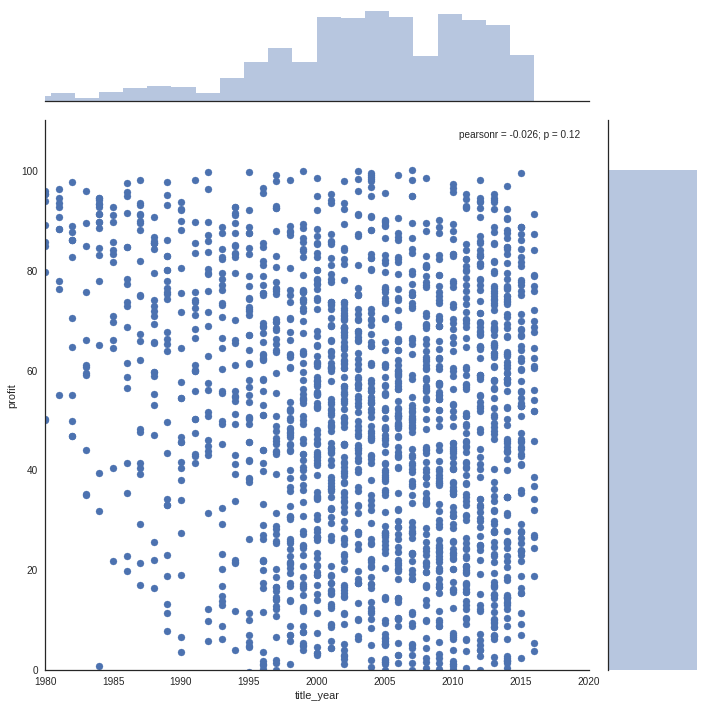

In [7]:
g = sns.jointplot(x="title_year", y="profit",kind='scatter',size=10,ylim = [0,110],xlim=[1980,2020],data=df2)

As we can see percentage profits were more in years following 2000 and also the number of movies.

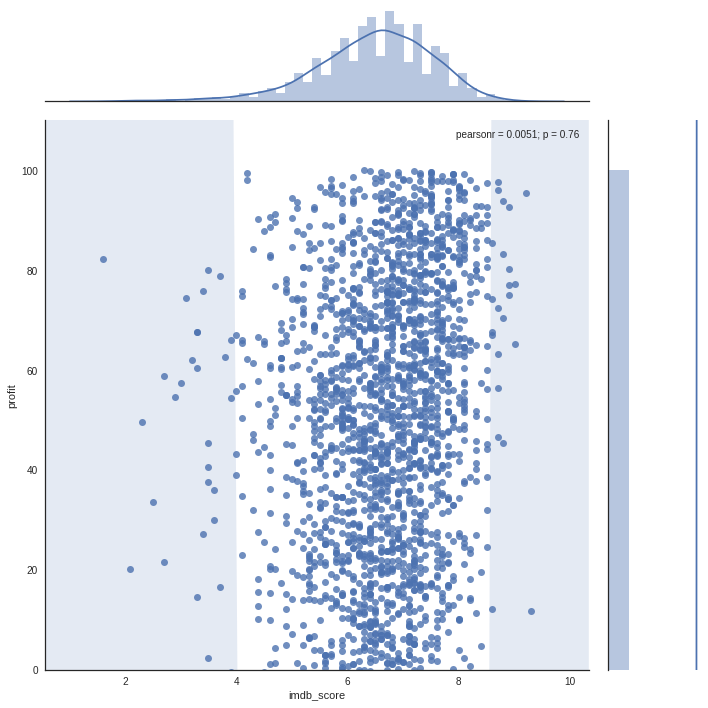

In [8]:
h = sns.jointplot(x="imdb_score", y="profit",kind='reg',size=10,ylim = [0,110],data=df2)

Again we can observe there is no correlation between IMDB score and profit made by the movies and all the movies get around 7-8 score regardless of their earnings.

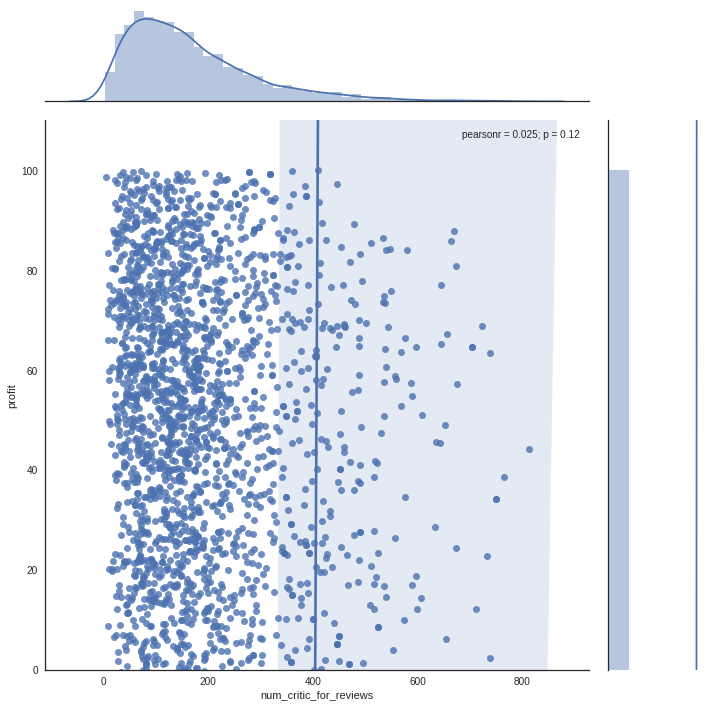

In [9]:
h = sns.jointplot(x="num_critic_for_reviews", y="profit",kind='reg',size=10,ylim = [0,110],data=df2)

No relation between number of critics and profit earned.

Following plots show the scatter plot of all the attributes with each other.

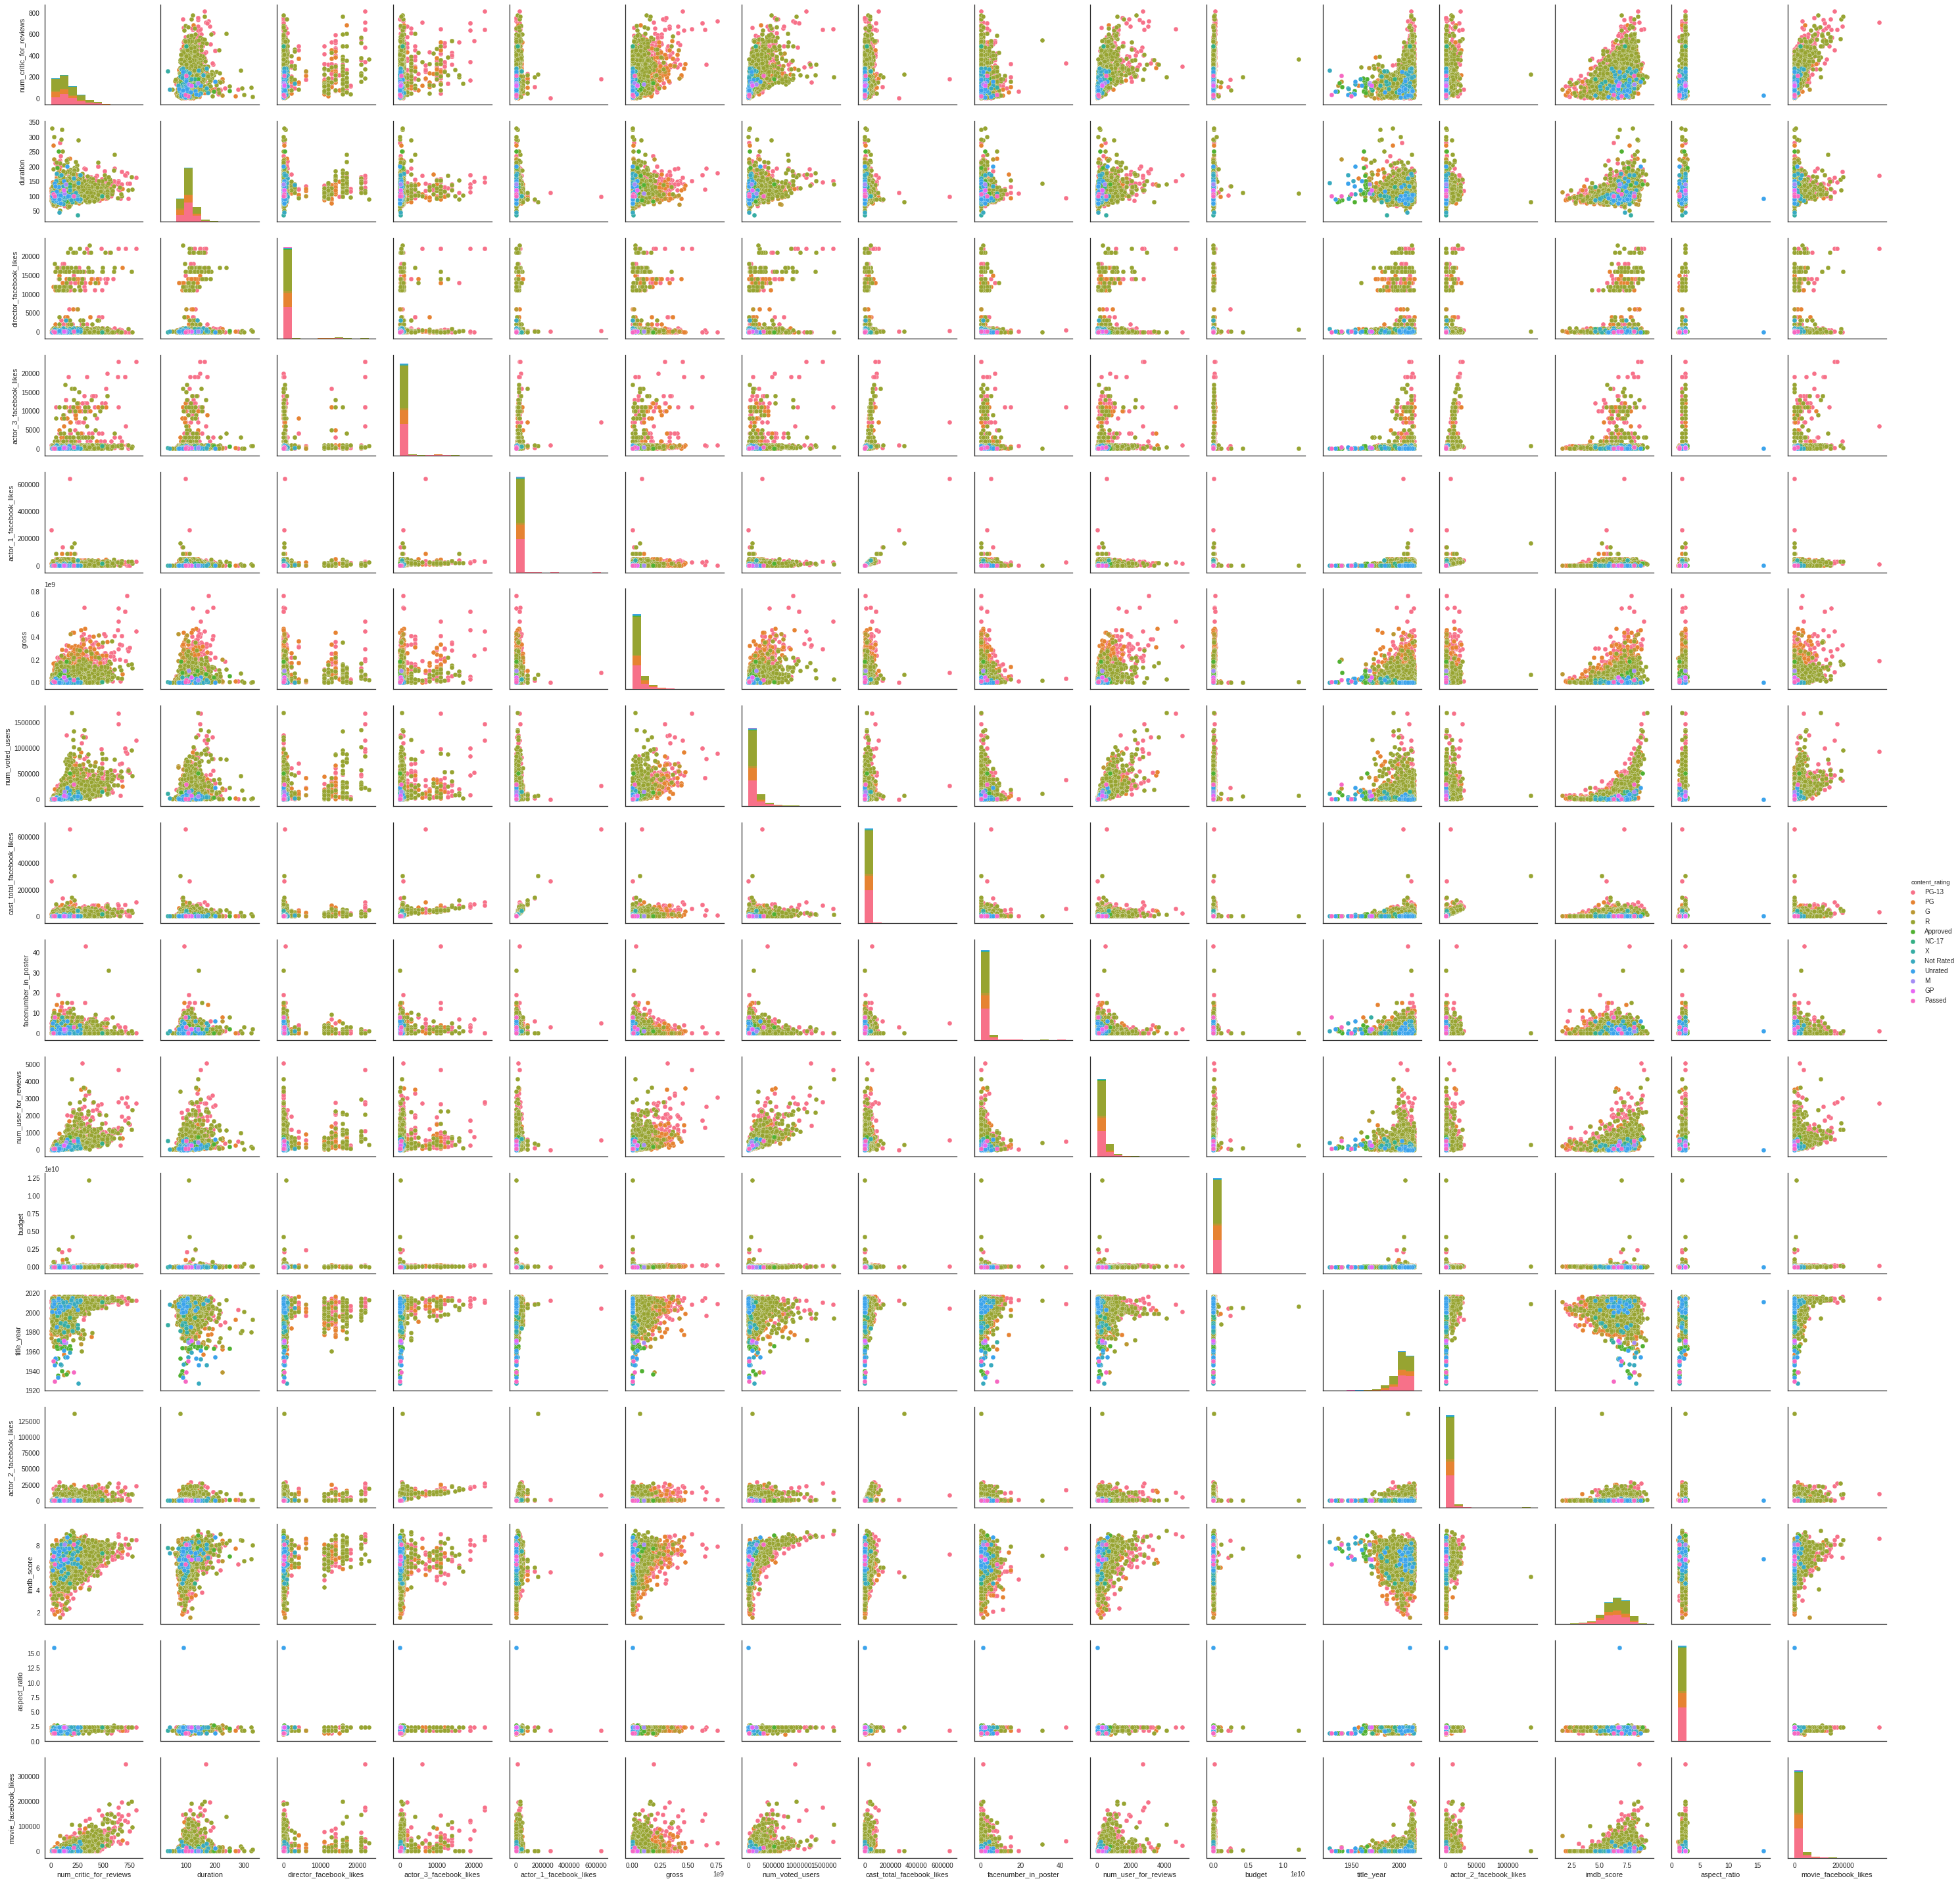

In [10]:
g = sns.pairplot(df1,hue='content_rating')

In [11]:
print (df2.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             3756.000000  3756.000000              3756.000000   
mean               167.378328   110.257987               807.336528   
std                123.452040    22.646717              3068.171683   
min                  2.000000    37.000000                 0.000000   
25%                 77.000000    96.000000                11.000000   
50%                138.500000   106.000000                64.000000   
75%                224.000000   120.000000               235.000000   
max                813.000000   330.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3756.000000             3756.000000  3.756000e+03   
mean               771.279553             7751.338658  5.261282e+07   
std               1894.249869            15519.339621  7.031787e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  